In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
microbiology_data_string = "microbiology_all_11.csv"
microbiology_data = pd.read_csv(microbiology_data_string, encoding="latin1")

In [ ]:
plt.scatter(microbiology_data.orgid, microbiology_data.abid)


In [ ]:
plt.scatter(microbiology_data.abid, microbiology_data.interpretation)
plt.xlabel('AB')
plt.ylabel('Interpretation')

In [ ]:
sns.lmplot('orgid', 'abid', data = microbiology_data)

In [ ]:
#Mathematics on Supervised Learning
#When the line is the best fit line 

#Univariate linear regression

X = microbiology_data.orgid


In [9]:
X = np.vstack(microbiology_data.orgid)

In [10]:
X

array([[23],
       [23],
       [23],
       ...,
       [23],
       [23],
       [23]])

In [11]:
X.size

266223

In [12]:
X = np.array([[value,1] for value in X])

In [13]:
Y = microbiology_data.abid

In [14]:
X

array([[array([23]), 1],
       [array([23]), 1],
       [array([23]), 1],
       ...,
       [array([23]), 1],
       [array([23]), 1],
       [array([23]), 1]], dtype=object)

In [15]:
m, b = np.linalg.lstsq(X,Y)[0]

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [16]:
m


-0.01163435686863411

In [17]:
 b

16.528228910301394

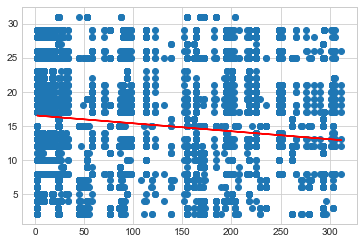

In [18]:
plt.plot(microbiology_data.orgid,microbiology_data.abid,'o')

x = microbiology_data.orgid

plt.plot(x, m*x + b, 'r', label='Best Fit Line')

In [19]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print("rmse %.2f" %rmse)

rmse 7.87


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [20]:
import sklearn
from sklearn.linear_model import LinearRegression

In [21]:
lreg = LinearRegression()

In [22]:
X_multi = microbiology_data.drop('interpretation',1)

In [23]:
Y_target = microbiology_data.interpretation

In [24]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print('The estimated intercept coeff is %.2f ' %lreg.intercept_)

print('The number of coeff used was %d ' %len(lreg.coef_))

The estimated intercept coeff is 1.03 
The number of coeff used was 4 


In [26]:
coeff_df = DataFrame(microbiology_data.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,specid,-0.000287
1,orgid,0.000743
2,abid,-0.003076
3,compid,0.322797
4,interpretation,NaN


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, microbiology_data.interpretationid)

In [29]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, microbiology_data.interpretation)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(199667, 2) (66556, 2) (199667,) (66556,)


In [30]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [32]:
print('Fit a model X train and calculate the MSE with Y_train: %.2f ' % np.mean((Y_train - pred_train)**2))

print('Fit a model X_train and calculate the MSE with X test and Y test: %.2f' % np.mean((Y_test - pred_test)**2))

Fit a model X train and calculate the MSE with Y_train: 0.30 
Fit a model X_train and calculate the MSE with X test and Y test: 0.30


Text(0.5,1,'Residual Plot')

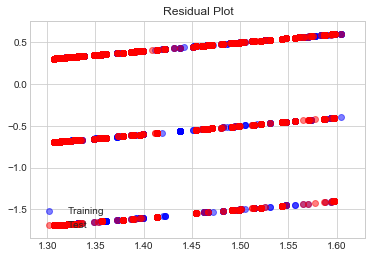

In [36]:
train = plt.scatter(pred_train,(pred_train - Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin = 1.49, xmax=1.49)

plt.legend((train, test),('Training', 'Test'), loc='lower left')

plt.title('Residual Plot')